# How is NBA Salary linked to Player Performance?

### The goals of this project:

#### 1. Explore and analyze how NBA players' salaries are linked to performance.
#### 2. Driver better decisions to identify quality or above-average players at a low-cost or below-average pay (in per minute terms)
#### 3. Players who are overpaid/underpaid by position

In [187]:
# Import Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
import requests
import cufflinks as cf
from bs4 import BeautifulSoup


import plotly
from plotly.offline import iplot, init_notebook_mode
cf.go_offline(connected=True)
init_notebook_mode(connected=True)
import chart_studio
import chart_studio.plotly as py

### Scraping Player Season Totals from 2000 to 2022 from Basketball Reference

#### https://www.basketball-reference.com/leagues/NBA_2020_totals.html

In [231]:
#Scraping from Basketball Reference to obtain player season totals

years = list(range(2000, 2023))

url_totals = "https://www.basketball-reference.com/leagues/NBA_{}_totals.html"


#For loop to request all years from 2000 to 2022 and store as html 
for year in years:
    url = url_totals.format(year)
    data = requests.get(url)
    
    with open("totals/{}.html".format(year), "w+", encoding = "utf-8") as f:
        f.write(data.text)

In [269]:
# Read in HTML

with open("totals/2020.html", encoding ="utf-8") as f:
    page = f.read()
    soup = BeautifulSoup(page, "html.parser") # Parse pages with BeautifulSoup
    totals_2020_season = soup.find(id= "all_totals_stats") # Find the element for stats table
    totals_2020_szn = pd.read_html(str(totals_2020_season)) # Read the html
    
totals_2020_szn[0]

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,1,Steven Adams,C,26,OKC,63,63,1680,283,478,...,.582,207,376,583,146,51,67,94,122,684
1,2,Bam Adebayo,PF,22,MIA,72,72,2417,440,790,...,.691,176,559,735,368,82,93,204,182,1146
2,3,LaMarcus Aldridge,C,34,SAS,53,53,1754,391,793,...,.827,103,289,392,129,36,87,74,128,1001
3,4,Kyle Alexander,C,23,MIA,2,0,13,1,2,...,NaN,2,1,3,0,0,0,1,1,2
4,5,Nickeil Alexander-Walker,SG,21,NOP,47,1,591,98,266,...,.676,9,75,84,89,17,8,54,57,267
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
672,525,Trae Young,PG,21,ATL,60,60,2120,546,1249,...,.860,32,223,255,560,65,8,289,104,1778
673,526,Cody Zeller,C,27,CHO,58,39,1341,251,479,...,.682,160,251,411,88,40,25,75,140,642
674,527,Tyler Zeller,C,30,SAS,2,0,4,1,4,...,NaN,3,1,4,0,0,0,0,0,2
675,528,Ante Žižić,C,23,CLE,22,0,221,41,72,...,.737,18,48,66,6,7,5,10,27,96


In [249]:
# For loop to combine all total htmls into a list of dataframes

#Range of Seasons to Start and End
years = list(range(2000, 2023))

#Empty list to append the html tables
szn_ttl_00_22 = []

#For loops for read and append NBA seasons from 2000 to 2022
for year in years:
    with open("totals/{}.html".format(year), encoding = "utf-8") as f:
        page = f.read()
        soup = BeautifulSoup(page, "html.parser")
        total_table = soup.find(id = "all_totals_stats")
        total = pd.read_html(str(total_table))[0]
        total["Year"] = year # Append a year column to distinguish years
        
        szn_ttl_00_22.append(total)

In [250]:
szn_ttl_00_22_final = pd.concat(szn_ttl_00_22)
szn_ttl_00_22_final

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Year
0,1,Tariq Abdul-Wahad,SG,25,TOT,61,56,1578,274,646,...,101,190,291,98,59,28,106,147,697,2000
1,1,Tariq Abdul-Wahad,SG,25,ORL,46,46,1205,223,515,...,77,162,239,72,53,16,87,116,563,2000
2,1,Tariq Abdul-Wahad,SG,25,DEN,15,10,373,51,131,...,24,28,52,26,6,12,19,31,134,2000
3,2,Shareef Abdur-Rahim,SF,23,VAN,82,82,3223,594,1277,...,218,607,825,271,89,87,249,244,1663,2000
4,3,Cory Alexander,PG,26,DEN,29,2,329,28,98,...,8,34,42,58,24,2,28,39,82,2000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
837,601,Thaddeus Young,PF,33,TOR,26,0,475,67,144,...,40,75,115,45,31,11,22,43,164,2022
838,602,Trae Young,PG,23,ATL,76,76,2652,711,1544,...,50,234,284,737,72,7,303,128,2155,2022
839,603,Omer Yurtseven,C,23,MIA,56,12,706,130,247,...,85,209,294,49,17,20,41,84,299,2022
840,604,Cody Zeller,C,29,POR,27,0,355,51,90,...,50,75,125,22,8,6,19,56,140,2022


## Data Cleaning & Manipulation

In [251]:
'''This function take in a single dataframe and returns the record if there is only one row. 
If there are multiple rows for a player, it will take the total or TOT and replace the Team(Tm) with the 
most current team.
'''

def single_record(df):
    if df.shape[0] == 1:
        return df
    else:
        row = df[df["Tm"] == "TOT"]
        row["Tm"] = df.iloc[1,:]["Tm"]
        return row

szn_ttl_00_22_final = szn_ttl_00_22_final.groupby(["Player", "Year"]).apply(single_record)

In [252]:
szn_ttl_00_22_final

szn_ttl_00_22_final.index = szn_ttl_00_22_final.index.droplevel()
szn_ttl_00_22_final.index = szn_ttl_00_22_final.index.droplevel()

In [253]:
szn_ttl_00_22_final.shape

(10980, 31)

In [261]:
#Convert columns from object to floatsw for calculation purposes
for stats in szn_ttl_00_22_final.columns[6:]:
    szn_ttl_00_22_final[stats] = pd.to_numeric(szn_ttl_00_22_final[stats])

In [262]:
szn_ttl_00_22_final["Player"] = szn_ttl_00_22_final["Player"].str.replace("*", "", regex = False)


In [264]:
szn_ttl_00_22_final["Tm"].unique()

array(['LAL', 'MIA', 'CLE', 'CHI', 'GSW', 'DAL', 'IND', 'WAS', 'MIN',
       'HOU', 'SAC', 'ORL', 'DEN', 'NOH', 'TOR', 'CHO', 'PHI', 'BOS',
       'OKC', 'NJN', 'LAC', 'PHO', 'ATL', 'MEM', 'UTA', 'CHA', 'NYK',
       'NOP', 'POR', 'BRK', 'DET', 'SAS', 'SEA', 'MIL', 'CHH', 'VAN',
       'NOK', 'TOT'], dtype=object)

In [263]:
szn_ttl_00_22_final.to_excel("./Data Files/szn_ttl_00_22_final.xlsx")

In [9]:
# # Using selenium to parse JS Pages
# from selenium import webdriver
# import time

# driver = webdriver.Chrome("/Users/alexc/Desktop/NBA Scrape Project/NBA_Salaries_Performance/NBA_Salaries_Performance/chromedriver")

In [10]:
# player_szn_stats = "https://www.basketball-reference.com/leagues/NBA_{}_totals.html"

# for year in years:
#     url = player_szn_stats.format(year)

#     driver.get(url)
#     driver.execute_script("window.scrollTo(1,10000)")
#     time.sleep(2)

#     html = driver.page_source
    
#     with open("Totals/{}.html".format(year), "w+", encoding = 'utf-8') as f:
#         f.write(html)

In [11]:
# # For loop to combine all the htmls into a list of dfs

# player_szn_totals = []

# for year in years:
#     with open("Totals/{}.html".format(year), encoding= "utf-8") as f:
#         page = f.read()
#     soup = BeautifulSoup(page, "html.parser")
#     total_table = soup.find(id= "all_totals_stats")
#     total_stats = pd.read_html(str(total_table))[0]
#     total_stats["Year"] = year
    
#     player_szn_totals.append(total_stats)

In [12]:
# player_szn_totals_df = pd.concat(player_szn_totals)
# player_szn_totals_df.to_csv("./Data Files/player_szn_totals.csv")

In [13]:
# player_szn_totals_df.shape

In [16]:
#Excluding rows where Rk is Rk

szn_ttl_df_cleaned = szn_ttl_df[szn_ttl_df["Rk"] != "Rk"]

In [17]:
# szn_ttl_df_cleaned.to_csv("./Data Files/szn_ttl_df_cleaned.csv")

### Scrape player salary data from HoopsHype

In [118]:
# HoopsHype URL

hh_url = "https://hoopshype.com/salaries/players/"

# Make request to get the text
r = requests.get(hh_url, timeout=2.5)
r_html = r.text

# Beautiful soup to parse the html page
soup = BeautifulSoup(r_html, "html.parser")

#Find the table 
salary_tables = soup.find('table')

In [119]:
#Fetch total number of data cells since the html table element is composed
# of table data cells identified with the td html tag
length = len(salary_tables.find_all("td"))

#Oue desired data starts at index 10 (player names), followed by our salary data
#at indexes 11 to 15 for 2019/20 - 2024/25 seasons
player_names=[salary_tables.find_all("td")[i].text.strip() for i in range(9,length,8)]

column1=[salary_tables.find_all("td")[i].text.strip() for i in range(10,length,8)]
column2=[salary_tables.find_all("td")[i].text.strip() for i in range(11,length,8)]
column3=[salary_tables.find_all("td")[i].text.strip() for i in range(12,length,8)]
column4=[salary_tables.find_all("td")[i].text.strip() for i in range(13,length,8)]
column5=[salary_tables.find_all("td")[i].text.strip() for i in range(14,length,8)]
column6=[salary_tables.find_all("td")[i].text.strip() for i in range(15,length,8)]

In [124]:
df_dictionary = {'player_names': player_names,
                 "2019/20": column1,
                 "2020/21": column2,
                 "2021/22": column3,
                "2022/23": column4,
                "2023/24": column5,
                "2024/25": column6}

salary_df_hh = pd.DataFrame(df_dictionary)

In [137]:
#Replace the special characters so we can convert to numeric
salary_df_hh.replace("\$", "", regex = True, inplace = True)
salary_df_hh.replace(",", "", regex = True, inplace = True)

In [138]:
for salary in salary_df_hh.columns[1:]:
    salary_df_hh[salary] = pd.to_numeric(salary_df_hh[salary])

In [139]:
salary_df_hh.to_excel("./Data Files/salary_df_hh.xlsx")

## Scraping Salary from Basketball Reference 

### Salaries from the 2022-2023 Season and on

In [50]:
# Create a request to get text from 
salaries_url = 'https://www.basketball-reference.com/contracts/players.html'
salaries_response = requests.get(salaries_url)
page = salaries_response.text

soup = BeautifulSoup(page)

salaries = []
for x in soup.find_all('tr')[2:]:
    try:
        tds_salaries = x.find_all('td')
        name_s = tds_salaries[0].text
        team = tds_salaries[1].text
        salary = tds_salaries[2].text
        salary_24 = tds_salaries[3].text
        salary_25 = tds_salaries[4].text
        salary_26 = tds_salaries[5].text
        salary_27 = tds_salaries[6].text
        salary_28 = tds_salaries[7].text
        gntd = tds_salaries[8].text
        salaries.append([name_s, team, salary[1:], salary_24[1:], salary_25[1:], salary_26[1:], salary_27[1:],salary_28[1:], gntd[1:]])
    except IndexError:
        print('This is a header!')

salaries_df = pd.DataFrame(salaries, columns=['Player', "Team", '2022-23', '2023-2024', '2024-2025', '2025-2026', '2026-2027', '2027-2028', 'Guaranteed'])

print(salaries_df)

This is a header!
This is a header!
This is a header!
This is a header!
This is a header!
This is a header!
This is a header!
This is a header!
This is a header!
This is a header!
This is a header!
This is a header!
This is a header!
This is a header!
This is a header!
This is a header!
This is a header!
This is a header!
This is a header!
This is a header!
This is a header!
This is a header!
This is a header!
This is a header!
This is a header!
This is a header!
This is a header!
This is a header!
This is a header!
This is a header!
This is a header!
This is a header!
This is a header!
This is a header!
This is a header!
This is a header!
This is a header!
This is a header!
This is a header!
This is a header!
This is a header!
This is a header!
This is a header!
This is a header!
This is a header!
This is a header!
This is a header!
This is a header!
                Player Team     2022-23   2023-2024   2024-2025   2025-2026  \
0        Stephen Curry  GSW  48,070,014  51,915,615  55,7

In [52]:
salaries_df.to_excel("./Data Files/salaries_df_bbref.xlsx")

In [54]:
salaries_df.head()

,Player,Team,2022-23,2023-2024,2024-2025,2025-2026,2026-2027,2027-2028,Guaranteed
0,Stephen Curry,GSW,"48,070,014","51,915,615","55,761,216","59,606,817",,,"215,353,662"
1,Russell Westbrook,LAL,"47,063,478",,,,,,"47,063,478"
2,LeBron James,LAL,"44,474,988","53,369,986","57,639,585",,,,"97,844,974"
3,Kevin Durant,BRK,"44,119,845","47,649,433","51,179,021","54,708,609",,,"197,656,908"
4,Bradley Beal,WAS,"43,279,250","46,741,590","50,203,930","53,666,270","57,128,610",,"193,891,040"


In [55]:
salaries_df.dtypes

Player        object
Team          object
2022-23       object
2023-2024     object
2024-2025     object
2025-2026     object
2026-2027     object
2027-2028     object
Guaranteed    object
dtype: object

In [56]:
#Replace the commas in the salaries

salaries_df.replace(",", "", regex = True, inplace = True)

#Convert salary columns fromo object to columns for calculation purposes
for salary in salaries_df.columns[2:]:
    salaries_df[salary] = pd.to_numeric(salaries_df[salary])

In [59]:
#Replace NaN values with 0
salaries_df.fillna(0, inplace = True)

In [210]:
salaries_df.to_excel("./Data Files/salaries_bbref.xlsx")

### Merge Hype Hoops Salaries and Stats Dataframes from 2020/21 Season

In [91]:
szn_stats_21 = szn_ttl_df_final.loc[szn_ttl_df_final["Year"] == 2021]

In [159]:
szn_stats_20 = szn_ttl_df_final.loc[szn_ttl_df_final["Year"] == 2020]

In [141]:
merged_df_21 = szn_stats_21.merge(salary_df_hh, how = "left", left_on = "Player", right_on = "player_names")

In [160]:
merged_df_20 = szn_stats_20.merge(salary_df_hh, how = "left", left_on = "Player", right_on = "player_names")

In [173]:
merged_df_20.to_excel("./Data Files/merged_df_20.xlsx")
merged_df_21.to_excel("./Data Files/merged_df_21.xlsx")

# Data Exploration and Analysis

#### Goals: Identify above-average performers with below-average pay

These are the players that can fill in role positions to set their teams up for success and a run at the Larry O' Brien trophy

Dean Oliver, a statistician and assistant collegiate basketball coach, developed a method to approximate a player's on-court performance. This metric is called the [Approximate Value](https://www.nbastuffer.com/analytics101/approximate-value/) (AV).

In [148]:
# Compute AV and per-minute salary for 2020-21 season

merged_df_21["Credits"] = merged_df_21["PTS"] + merged_df_21["TRB"] + merged_df_21["AST"] +\
merged_df_21["STL"] + merged_df_21["BLK"] - (merged_df_21["FGA"] - merged_df_21["FG"]) - (merged_df_21["FTA"] - merged_df_21["FT"]) -  merged_df_21["TOV"]

# Get AV Data
merged_df_21["Approximate Value"] = (merged_df_21["Credits"] ** (0.75)) / 21


In [161]:
# Compute AV and per-minute salary for 2019-20 season

merged_df_20["Credits"] = merged_df_20["PTS"] + merged_df_20["TRB"] + merged_df_20["AST"] +\
merged_df_20["STL"] + merged_df_20["BLK"] - (merged_df_20["FGA"] - merged_df_20["FG"]) - (merged_df_20["FTA"] - merged_df_20["FT"]) -  merged_df_20["TOV"]

# Get AV Data
merged_df_20["Approximate Value"] = (merged_df_20["Credits"] ** (0.75)) / 21


In [149]:
# Per Minute Salary for 2020-21 season

merged_df_21["$_per_min-20/21"] = merged_df_21["2020/21"]/merged_df_21["MP"]

In [162]:
# Per Minute Salary for 2019-20 season

merged_df_20["$_per_min-19/20"] = merged_df_20["2019/20"]/merged_df_20["MP"]

In [152]:
merged_df_21["$_per_min-20/21"].describe()

count       318.000000
mean       9724.232593
std       23606.024796
min           0.000000
25%           0.000000
50%        5571.362062
75%       11705.533874
max      328571.406250
Name: $_per_min-20/21, dtype: float64

In [163]:
merged_df_20["$_per_min-19/20"].describe()

count       269.000000
mean      14336.478828
std       31418.440876
min         337.909031
25%        4337.387812
50%        8266.533066
75%       14908.302603
max      345827.438849
Name: $_per_min-19/20, dtype: float64

<AxesSubplot:xlabel='$_per_min-20/21', ylabel='Approximate Value'>

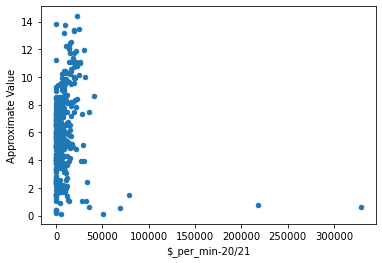

In [198]:
merged_df_21.plot(kind = "scatter", x ="$_per_min-20/21", y = "Approximate Value")

<AxesSubplot:xlabel='$_per_min-19/20', ylabel='Approximate Value'>

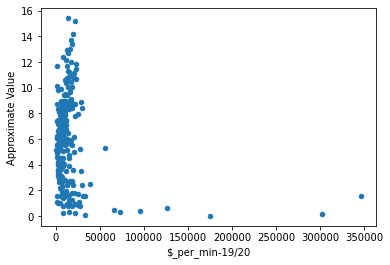

In [197]:
merged_df_20.plot(kind = "scatter", x ="$_per_min-19/20", y = "Approximate Value")

In [155]:
#Using the .describe method, over the ["$_per_min-20/21"]  column, the data is right-skewed.
# Meaning over 75% of the data points are less than or equal to 11.7k, with
#with the mean at $9.7 or $10k

merged_df_21["$_per_min-20/21"].describe()

count       318.000000
mean       9724.232593
std       23606.024796
min           0.000000
25%           0.000000
50%        5571.362062
75%       11705.533874
max      328571.406250
Name: $_per_min-20/21, dtype: float64

<AxesSubplot:xlabel='$_per_min-20/21', ylabel='Approximate Value'>

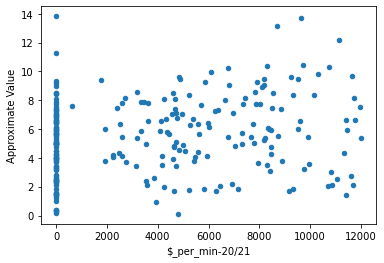

In [158]:
#There are definitely some outliers. Perhaps players with really high per-minute salary 
# while only played small amount of games due to injuries

merged_df_21[merged_df_21["$_per_min-20/21"] <= 12000].plot(kind = "scatter", x="$_per_min-20/21", y = "Approximate Value")


In [193]:
#Using the .describe method, over the ["$_per_min-19/20"]  column, the data is right-skewed.
# Meaning over 75% of the data points are less than or equal to 14k, with
#with the mean at $14k

merged_df_20["$_per_min-19/20"].describe()

count       269.000000
mean      14336.478828
std       31418.440876
min         337.909031
25%        4337.387812
50%        8266.533066
75%       14908.302603
max      345827.438849
Name: $_per_min-19/20, dtype: float64

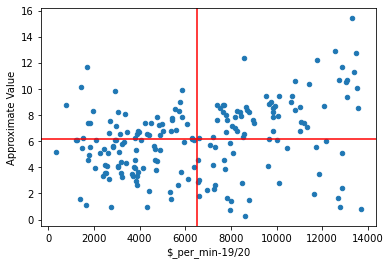

In [199]:
merged_df_20[merged_df_20["$_per_min-19/20"] <= 14000].plot(kind = "scatter", x="$_per_min-19/20", y = "Approximate Value")

plt.axvline(x=merged_df_20[merged_df_20["$_per_min-19/20"]<=14000]["$_per_min-19/20"].mean(),c="red")
plt.axhline(y=merged_df_20[merged_df_20["$_per_min-19/20"]<=14000]["Approximate Value"].mean(),c="red")

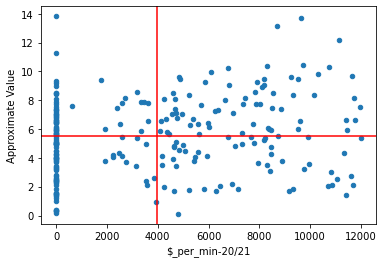

In [200]:
#Use the mean values to split the chart into quadrants for 2020-2021 season

merged_df_21[merged_df_21["$_per_min-20/21"] <= 12000].plot(kind = "scatter", x="$_per_min-20/21", y = "Approximate Value")

plt.axvline(x=merged_df_21[merged_df_21["$_per_min-20/21"]<=12000]["$_per_min-20/21"].mean(),c="red")
plt.axhline(y=merged_df_21[merged_df_21["$_per_min-20/21"]<=12000]["AV"].mean(),c="red")

In [175]:
merged_df_21.columns

Index(['Rk', 'Player', 'Pos', 'Age', 'Tm', 'G', 'GS', 'MP', 'FG', 'FGA', 'FG%',
       '3P', '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%',
       'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS', 'Year',
       'player_names', '2019/20', '2020/21', '2021/22', '2022/23', '2023/24',
       '2024/25', 'Credits', 'AV', '$_per_min-20/21', 'Approximate Value'],
      dtype='object')

In [204]:
merged_df_21.iplot(
        x='$_per_min-20/21',
        y='Approximate Value',
        categories='Tm',
        text="player_names",
        vline= {"x":merged_df_21[merged_df_21["$_per_min-20/21"]<=12000]["$_per_min-20/21"].mean(),
                "color":"#FF0000",
                "dash": "dash"
               },
        hline={"y":merged_df_21[merged_df_21["$_per_min-20/21"]<=12000]["Approximate Value"].mean(),
               "color":"#FF0000",
               "dash": "dash"
              },
        xTitle='$ per min_salary',
        yTitle='Approximate Value',
        title='$ per minute vs. Approximate Value for 2020-21 Season')

C:\Users\alexc\anaconda3\lib\site-packages\cufflinks\plotlytools.py:807: FutureWarning:

The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead

C:\Users\alexc\anaconda3\lib\site-packages\cufflinks\plotlytools.py:810: FutureWarning:

The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead



In [205]:
merged_df_20.iplot(
        x='$_per_min-19/20',
        y='Approximate Value',
        categories='Tm',
        text="player_names",
        vline= {"x":merged_df_20[merged_df_20["$_per_min-19/20"]<=14000]["$_per_min-19/20"].mean(),
                "color":"#FF0000",
                "dash": "dash"
               },
        hline={"y":merged_df_20[merged_df_20["$_per_min-19/20"]<=14000]["Approximate Value"].mean(),
               "color":"#FF0000",
               "dash": "dash"
              },
        xTitle='$ per min_salary',
        yTitle='Approximate Value',
        title='$ per minute vs. Approximate Value for 2019-20 Season')

C:\Users\alexc\anaconda3\lib\site-packages\cufflinks\plotlytools.py:807: FutureWarning:

The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead

C:\Users\alexc\anaconda3\lib\site-packages\cufflinks\plotlytools.py:810: FutureWarning:

The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead



#### The resulting graph is the following, with players with above-average AV and below-average $ per minute are being located in the upper left quadrant of the graph.

In [219]:
# Create a list of free agents with high ROI players 

#Slice dataframe to remove outliers 
completed_df = merged_df_20[merged_df_20["$_per_min-19/20"] <= 14000]

#Calculate the mean for $ per min & AV
dollar_min_mean = completed_df["$_per_min-19/20"].mean()
av_mean = completed_df['Approximate Value'].mean()



In [220]:
# Filter the data to keep only above average performances with below average salary

high_roi_agents = completed_df[(completed_df["$_per_min-19/20"] < dollar_min_mean) & (completed_df["Approximate Value"] < av_mean)]

high_roi_agents.reset_index(inplace = True)

In [221]:
high_roi_agents

,index,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,...,player_names,2019/20,2020/21,2021/22,2022/23,2023/24,2024/25,Credits,Approximate Value,$_per_min-19/20
0,1,223,Aaron Holiday,PG,23,IND,66,33,1617,233,...,Aaron Holiday,1968175.0,0.0,0.0,0.0,0.0,0.0,648,6.115922,1217.176871
1,4,441,Admiral Schofield,PF,22,WAS,33,2,368,35,...,Admiral Schofield,508891.0,1761752.0,0.0,0.0,0.0,0.0,104,1.550800,1382.855978
2,10,293,Alex Len,C,26,ATL,55,12,970,177,...,Alex Len,3918600.0,0.0,0.0,0.0,0.0,0.0,646,6.101760,4039.793814
3,12,255,Alize Johnson,PF,23,IND,17,1,118,12,...,Alize Johnson,192293.0,0.0,0.0,0.0,0.0,0.0,67,1.115159,1629.601695
4,28,422,Austin Rivers,SG,27,HOU,68,4,1594,211,...,Austin Rivers,2905851.0,0.0,0.0,0.0,0.0,0.0,570,5.555036,1822.993099
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57,477,401,Theo Pinson,SG,24,BRK,33,0,365,45,...,Theo Pinson,1968175.0,0.0,0.0,0.0,0.0,0.0,107,1.584231,5392.260274
58,485,60,Tony Bradley,C,22,UTA,58,3,663,126,...,Tony Bradley,2036318.0,0.0,0.0,0.0,0.0,0.0,513,5.132970,3071.369532
59,487,116,Torrey Craig,SF,29,DEN,58,27,1072,124,...,Torrey Craig,5121951.0,0.0,0.0,0.0,0.0,0.0,426,4.465169,4777.939366
60,493,305,Trey Lyles,PF,24,SAS,63,53,1271,153,...,Trey Lyles,2625000.0,0.0,0.0,0.0,0.0,0.0,649,6.123000,2065.302911


In [222]:
high_roi_agents[high_roi_agents["2020/21"] == 0].sort_values(by = "Approximate Value", ascending= False)

,index,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,...,player_names,2019/20,2020/21,2021/22,2022/23,2023/24,2024/25,Credits,Approximate Value,$_per_min-19/20
60,493,305,Trey Lyles,PF,24,SAS,63,53,1271,153,...,Trey Lyles,2625000.0,0.0,0.0,0.0,0.0,0.0,649,6.123000,2065.302911
0,1,223,Aaron Holiday,PG,23,IND,66,33,1617,233,...,Aaron Holiday,1968175.0,0.0,0.0,0.0,0.0,0.0,648,6.115922,1217.176871
2,10,293,Alex Len,C,26,ATL,55,12,970,177,...,Alex Len,3918600.0,0.0,0.0,0.0,0.0,0.0,646,6.101760,4039.793814
33,269,381,Josh Okogie,SG,21,MIN,62,28,1547,170,...,Josh Okogie,1968175.0,0.0,0.0,0.0,0.0,0.0,640,6.059206,1272.252747
11,83,267,Cory Joseph,PG,28,SAC,72,26,1759,171,...,Cory Joseph,5155500.0,0.0,0.0,0.0,0.0,0.0,640,6.059206,2930.926663
56,470,125,Terence Davis,SG,22,TOR,72,4,1209,199,...,Terence Davis,4000000.0,0.0,0.0,0.0,0.0,0.0,627,5.966661,3308.519438
15,97,186,Danny Green,SG,32,LAL,68,68,1687,197,...,Danny Green,10000000.0,0.0,0.0,0.0,0.0,0.0,625,5.952381,5927.682276
5,34,45,Bismack Biyombo,C,27,CHO,53,29,1029,151,...,Bismack Biyombo,2905851.0,0.0,0.0,0.0,0.0,0.0,575,5.591542,2823.956268
54,465,174,Taj Gibson,C,34,NYK,62,56,1025,167,...,Taj Gibson,2905851.0,0.0,0.0,0.0,0.0,0.0,574,5.584247,2834.976585
4,28,422,Austin Rivers,SG,27,HOU,68,4,1594,211,...,Austin Rivers,2905851.0,0.0,0.0,0.0,0.0,0.0,570,5.555036,1822.993099


In [225]:
# Create a list of free agents with high ROI players 

#Slice dataframe to remove outliers 
completed_df_21 = merged_df_21[merged_df_21["$_per_min-20/21"] <= 12000]

#Calculate the mean for $ per min & AV
dollar_min_mean_21 = completed_df_21["$_per_min-20/21"].mean()
av_mean_21 = completed_df_21['Approximate Value'].mean()


In [228]:
# Filter the data to keep only above average performances with below average salary

high_roi_agents_21 = completed_df_21[(completed_df_21["$_per_min-20/21"] < dollar_min_mean_21) & (completed_df_21["Approximate Value"] < av_mean_21)]

high_roi_agents_21.reset_index(inplace = True)

In [229]:
high_roi_agents_21[high_roi_agents_21["2021/22"] == 0].sort_values(by = "Approximate Value", ascending= False)

,index,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,...,2019/20,2020/21,2021/22,2022/23,2023/24,2024/25,Credits,AV,$_per_min-20/21,Approximate Value
10,151,414,Dwight Powell,C,29,DAL,58,19,966,120,...,11080125.0,0.0,0.0,0.0,0.0,0.0,564,5.511122,0.0,5.511122
5,55,159,Bryn Forbes,SG,27,MIL,70,10,1354,250,...,2298385.0,0.0,0.0,0.0,0.0,0.0,546,5.378674,0.0,5.378674
53,471,76,Sterling Brown,SG,25,HOU,51,14,1229,150,...,3000000.0,0.0,0.0,0.0,0.0,0.0,530,5.260023,0.0,5.260023
54,478,175,Taj Gibson,C,35,NYK,45,3,936,99,...,2905851.0,0.0,0.0,0.0,0.0,0.0,511,5.117954,0.0,5.117954
58,497,62,Tony Bradley,C,23,PHI,42,8,684,131,...,2036318.0,0.0,0.0,0.0,0.0,0.0,505,5.072818,0.0,5.072818
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38,356,99,Marquese Chriss,PF,23,GSW,2,0,27,5,...,2193920.0,0.0,0.0,0.0,0.0,0.0,17,0.398674,0.0,0.398674
43,394,427,Nick Richards,PF,23,CHO,18,0,63,4,...,1782621.0,0.0,0.0,0.0,0.0,0.0,16,0.380952,0.0,0.380952
64,515,476,Tyrell Terry,PG,20,DAL,11,0,56,5,...,1782621.0,0.0,0.0,0.0,0.0,0.0,13,0.326015,0.0,0.326015
35,318,13,Kostas Antetokounmpo,PF,23,LAL,15,0,56,3,...,172555.0,0.0,0.0,0.0,0.0,0.0,13,0.326015,0.0,0.326015
